A notebook to convert npz to json for the javascript animation

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt

import cx_rate
import trials
import plotter

import json

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


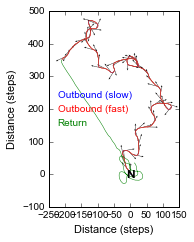

In [2]:
route_file = 'route.npz'
T_outbound = 1500
T_inbound = 1500

cx = cx_rate.CXRatePontin(noise=0.1)

h, v, _ = trials.load_route(filename=route_file)
h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                            T_outbound=T_outbound,
                                            T_inbound=T_inbound,
                                            noise=0.1,
                                            cx=cx,
                                            route=(h[:T_outbound], v[:T_outbound]))

fig, ax = plotter.plot_route(h, v, T_outbound=T_outbound, T_inbound=T_inbound,
                   plot_speed=True, plot_heading=True, quiver_color='black')

In [3]:
def save_to_json(h, v, log, filename):
    data = {}
    
    data['cl1'] = [np.around(cl1, 2).tolist() for cl1 in log.cl1.T]
    data['cpu1'] = [np.around(cpu1, 2).tolist() for cpu1 in log.cpu1.T]
    data['cpu4'] = [np.around(cpu4, 2).tolist() for cpu4 in log.cpu4.T]
    data['h'] = [np.around(val, 2).tolist() for val in h]
    data['motor'] = [np.around(np.array([np.average(cpu1[8:]), np.average(cpu1[:8])]),2).tolist() for cpu1 in log.cpu1.T]
    data['tb1'] = [np.around(tb1, 2).tolist() for tb1 in log.tb1.T]
    data['tn2'] = [np.around(tn2, 2).tolist() for tn2 in log.tn2.T]
    
    xy = np.cumsum(v, axis=0)
    data['x'] = np.around(xy[:-1, 0], 2).tolist()
    data['y'] = np.around(xy[:-1, 1], 2).tolist()
    
    with open(filename, 'w') as outfile:
        json.dump(data, outfile, indent=2)

In [4]:
save_to_json(h, v, log, 'path.json')